In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd



In [3]:
df_st1 = pd.read_csv("/content/drive/MyDrive/CS546/course-project/SemEval/data/data_en_subtask1/train.csv")
df_st2 = pd.read_csv("/content/drive/MyDrive/CS546/course-project/SemEval/data/data_en_subtask2/train.csv")
df_st3 = pd.read_csv("/content/drive/MyDrive/CS546/course-project/SemEval/data/data_en_subtask3/train.csv")

In [4]:
df_st1

,id,text,type,label
0,833042063,Chelsea Handler Admits She’s ‘Very Sexually At...,satire,2
1,832959523,How Theresa May Botched\n\nThose were the time...,satire,2
2,833039623,Robert Mueller III Rests His Case—Dems NEVER W...,satire,2
3,833032367,Robert Mueller Not Recommending Any More Indic...,satire,2
4,814777937,The Far Right Is Trying to Co-opt the Yellow V...,satire,2
...,...,...,...,...
428,832908978,Trump Kept Asking Friends If the Mueller Repor...,reporting,1
429,832910505,"The Mueller Circus is Over, Long Live the Muel...",satire,2
430,832917532,Robert Mueller Not Recommending Any More Indic...,reporting,1
431,832913653,Kamala Harris calls for AG Barr to testify on ...,reporting,1


In [5]:
df_st2

,id,text,frames
0,833042063,Chelsea Handler Admits She’s ‘Very Sexually At...,"Political,Morality,Fairness_and_equality,Exter..."
1,832959523,How Theresa May Botched\n\nThose were the time...,"Morality,Security_and_defense,Policy_prescript..."
2,833039623,Robert Mueller III Rests His Case—Dems NEVER W...,"Political,Crime_and_punishment,External_regula..."
3,833032367,Robert Mueller Not Recommending Any More Indic...,"Political,Crime_and_punishment,Fairness_and_eq..."
4,814777937,The Far Right Is Trying to Co-opt the Yellow V...,"Political,Morality,Fairness_and_equality,Exter..."
...,...,...,...
428,832908978,Trump Kept Asking Friends If the Mueller Repor...,"Political,Crime_and_punishment,External_regula..."
429,832910505,"The Mueller Circus is Over, Long Live the Muel...","Political,Morality,Crime_and_punishment,Qualit..."
430,832917532,Robert Mueller Not Recommending Any More Indic...,"Crime_and_punishment,Political,Legality_Consti..."
431,832913653,Kamala Harris calls for AG Barr to testify on ...,"Political,Crime_and_punishment,Fairness_and_eq..."


In [6]:
df_st3

,id,line,text,labels
0,111111111,3,Geneva - The World Health Organisation chief o...,Doubt
1,111111111,5,"""The next transmission could be more pronounce...",Appeal_to_Authority
2,111111111,13,"But Tedros voiced alarm that ""plague in Madaga...",Repetition
3,111111111,17,He also pointed to the presence of the pneumon...,Appeal_to_Fear-Prejudice
4,111111111,19,He praised the rapid response from WHO and Mad...,Appeal_to_Fear-Prejudice
...,...,...,...,...
3755,999001970,4,Also the Left killed comedy. This is what its ...,"Exaggeration-Minimisation,Slogans"
3756,999001970,5,Saturday Night Live writer and comedian Nimesh...,Exaggeration-Minimisation
3757,999001970,6,That's what Columbia snowflakes thought was of...,Name_Calling-Labeling
3758,999001970,8,"Comrades, these jokes you have been listening ...","Exaggeration-Minimisation,Name_Calling-Labeling"


In [7]:
id_st1 = set(df_st1.id.unique())
id_st2 = set(df_st2.id.unique())
id_st3 = set(df_st3.id.unique())

shared_ids = list(id_st1.intersection(id_st2).intersection(id_st3))

In [8]:
len(shared_ids)

412

In [9]:
st2_labels = set()

for labels in df_st2["frames"].values:
    for label in labels.split(","):
        st2_labels.add(label)

st2_labels = list(st2_labels) 
st2_labels

['Fairness_and_equality',
 'Public_opinion',
 'Health_and_safety',
 'Quality_of_life',
 'External_regulation_and_reputation',
 'Morality',
 'Legality_Constitutionality_and_jurisprudence',
 'Security_and_defense',
 'Crime_and_punishment',
 'Capacity_and_resources',
 'Political',
 'Policy_prescription_and_evaluation',
 'Economic',
 'Cultural_identity']

In [10]:
st3_labels = set()

for labels in df_st3["labels"].values:
    for label in labels.split(","):
        st3_labels.add(label)

st3_labels = list(st3_labels)

st3_labels

['Obfuscation-Vagueness-Confusion',
 'Appeal_to_Fear-Prejudice',
 'Whataboutism',
 'Appeal_to_Hypocrisy',
 'Appeal_to_Popularity',
 'Appeal_to_Authority',
 'Flag_Waving',
 'Exaggeration-Minimisation',
 'Loaded_Language',
 'Doubt',
 'Red_Herring',
 'Guilt_by_Association',
 'Straw_Man',
 'Name_Calling-Labeling',
 'Slogans',
 'Conversation_Killer',
 'False_Dilemma-No_Choice',
 'Repetition',
 'Causal_Oversimplification']

In [11]:
df_st2 = df_st2[['id', 'frames']]
df_st3 = df_st3[['id', 'labels']]

In [12]:
df_st3 = df_st3.groupby(['id'], as_index=False).agg({'labels': ','.join})

In [13]:
df_merged = df_st3.merge(df_st2, on='id')

df_merged

,id,labels,frames
0,111111111,"Doubt,Appeal_to_Authority,Repetition,Appeal_to...","Health_and_safety,Quality_of_life"
1,111111112,"Slogans,False_Dilemma-No_Choice,Slogans,Loaded...","Crime_and_punishment,Public_opinion,Fairness_a..."
2,111111113,"Causal_Oversimplification,Loaded_Language,Load...","Crime_and_punishment,Quality_of_life,Political..."
3,111111114,"Obfuscation-Vagueness-Confusion,Appeal_to_Fear...","Crime_and_punishment,Morality,Fairness_and_equ..."
4,111111115,"Loaded_Language,Appeal_to_Authority,Loaded_Lan...","Political,Crime_and_punishment,Morality,Legali..."
...,...,...,...
407,999001323,"Flag_Waving,Name_Calling-Labeling,Loaded_Langu...","Crime_and_punishment,Fairness_and_equality,Sec..."
408,999001419,"Loaded_Language,False_Dilemma-No_Choice,Name_C...","Political,Policy_prescription_and_evaluation,L..."
409,999001619,"Loaded_Language,Loaded_Language,Doubt,Exaggera...","Political,Crime_and_punishment,External_regula..."
410,999001621,"Doubt,Doubt,Doubt,Loaded_Language,Name_Calling...","Crime_and_punishment,Morality,External_regulat..."


In [31]:
import numpy as np

res = np.zeros((14, 19), dtype='int32')

res.shape

(14, 19)

In [32]:
def get_idx_labels(x):
    return st3_labels.index(x)
def get_idx_frames(x):
    return st2_labels.index(x)

for row in df_merged.iterrows():
    id = row[1]['id']
    labels_list = row[1]['labels'].split(',')
    frames_list = row[1]['frames'].split(',')

    idx_labels = list(map(get_idx_labels, labels_list))
    idx_frames = list(map(get_idx_frames, frames_list))

    # print(id)
    # print(labels_list)
    # print(idx_labels)
    # print(frames_list)
    # print(idx_frames)


    for i in idx_frames:
        for j in idx_labels:
            res[i][j] += 1

    
    

In [34]:
res

array([[   7,  101,    3,   17,   10,   53,   86,  178,  576,  152,   11,
          33,    6,  320,   59,   32,   48,  176,   86],
       [   1,   14,    3,    2,    1,    4,   16,   15,   68,   19,    6,
           2,    0,   39,    5,    6,    5,   29,   13],
       [   1,   66,    0,    0,    1,   32,   15,   33,  132,   33,    2,
           7,    1,   67,   12,    6,    5,   57,   19],
       [   4,   77,    5,    5,    2,   46,   27,   65,  264,   40,    4,
           5,    3,  130,   13,   16,   18,  113,   23],
       [   4,   98,    6,   10,    3,   38,  139,  144,  502,  144,   12,
          18,    4,  268,   46,   24,   38,  167,   50],
       [  13,  173,   11,   24,   11,   82,  124,  263, 1105,  286,   19,
          44,   10,  619,  111,   52,   79,  326,  138],
       [   7,  104,    7,   14,    6,   66,  143,  203,  749,  203,   32,
          18,    5,  417,   72,   35,   39,  203,   94],
       [   8,  146,   12,   18,    3,   51,  130,  187,  641,  166,   17,
         

In [36]:
df_res = pd.DataFrame(res, columns=st3_labels)

df_res

,Obfuscation-Vagueness-Confusion,Appeal_to_Fear-Prejudice,Whataboutism,Appeal_to_Hypocrisy,Appeal_to_Popularity,Appeal_to_Authority,Flag_Waving,Exaggeration-Minimisation,Loaded_Language,Doubt,Red_Herring,Guilt_by_Association,Straw_Man,Name_Calling-Labeling,Slogans,Conversation_Killer,False_Dilemma-No_Choice,Repetition,Causal_Oversimplification
0,7,101,3,17,10,53,86,178,576,152,11,33,6,320,59,32,48,176,86
1,1,14,3,2,1,4,16,15,68,19,6,2,0,39,5,6,5,29,13
2,1,66,0,0,1,32,15,33,132,33,2,7,1,67,12,6,5,57,19
3,4,77,5,5,2,46,27,65,264,40,4,5,3,130,13,16,18,113,23
4,4,98,6,10,3,38,139,144,502,144,12,18,4,268,46,24,38,167,50
5,13,173,11,24,11,82,124,263,1105,286,19,44,10,619,111,52,79,326,138
6,7,104,7,14,6,66,143,203,749,203,32,18,5,417,72,35,39,203,94
7,8,146,12,18,3,51,130,187,641,166,17,31,7,335,63,36,52,227,66
8,9,124,9,22,6,67,137,212,913,325,24,29,6,555,76,42,34,236,119
9,0,30,0,1,0,10,9,22,72,20,3,3,0,33,5,5,9,29,4


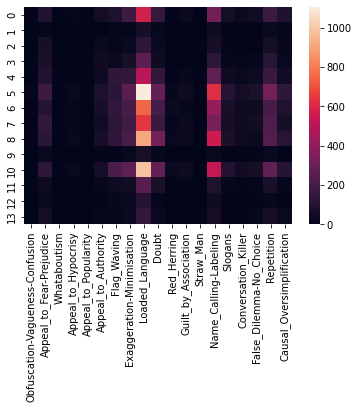

In [39]:
import seaborn as sns

sns.heatmap(df_res)